In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
%cd drive/My\ Drive

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs = 32

In [0]:
path_img = Path('fast-data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1450 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: fast-data;

Valid: LabelList (307 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: fast-data;

Test: None

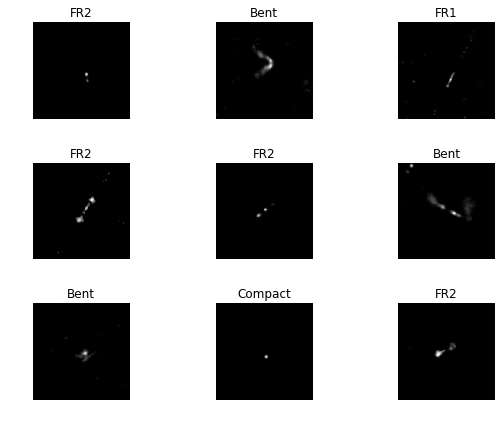

In [0]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Bent', 'Compact', 'FR1', 'FR2']


(4, 4)

In [0]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

In [0]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.304963,1.390062,0.579805,04:05
1,1.050683,0.748868,0.257329,00:21
2,0.891532,0.640293,0.254072,00:21
3,0.757226,0.605460,0.192182,00:21
4,0.660018,0.391279,0.149837,00:22
5,0.525439,0.316785,0.114007,00:22
6,0.488030,0.323378,0.107492,00:22
7,0.436530,0.317636,0.120521,00:22
8,0.384933,0.193612,0.074919,00:22
9,0.377618,0.197924,0.068404,00:22


In [0]:
learn.save('fai_dense201_lt')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

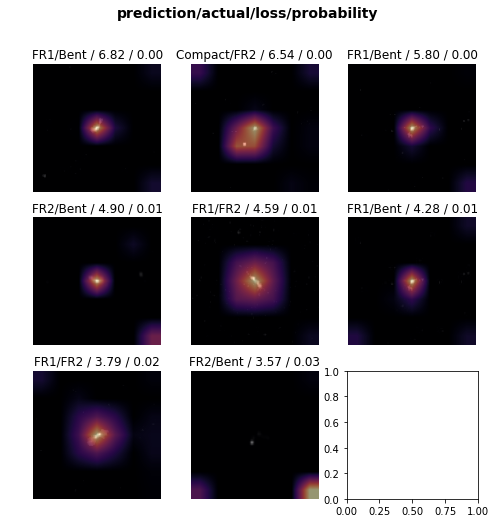

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

In [0]:
interp.most_confused(min_val=2)

[('FR1', 'FR2', 4), ('Bent', 'FR1', 3), ('Bent', 'FR2', 3), ('FR2', 'FR1', 3)]

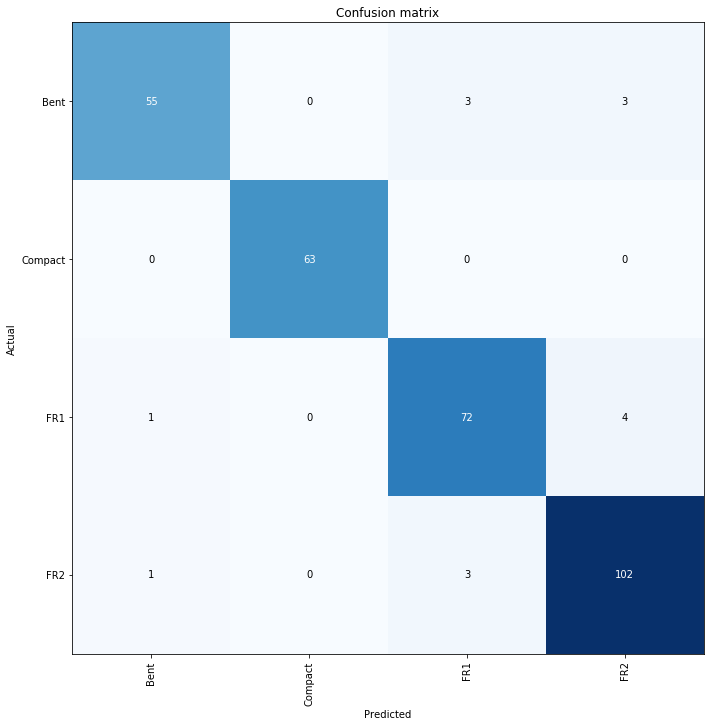

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
learn.export('lt-201.pkl')

In [0]:
img = open_image('fast-data/test/Bent/J003113.86+001236.2.jpeg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [0]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

In [0]:
learn.load('fai_dense201_lt')

In [0]:
#Testing the model

path_img = Path('fast-data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1450 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: fast-data;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: fast-data;

Test: None

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

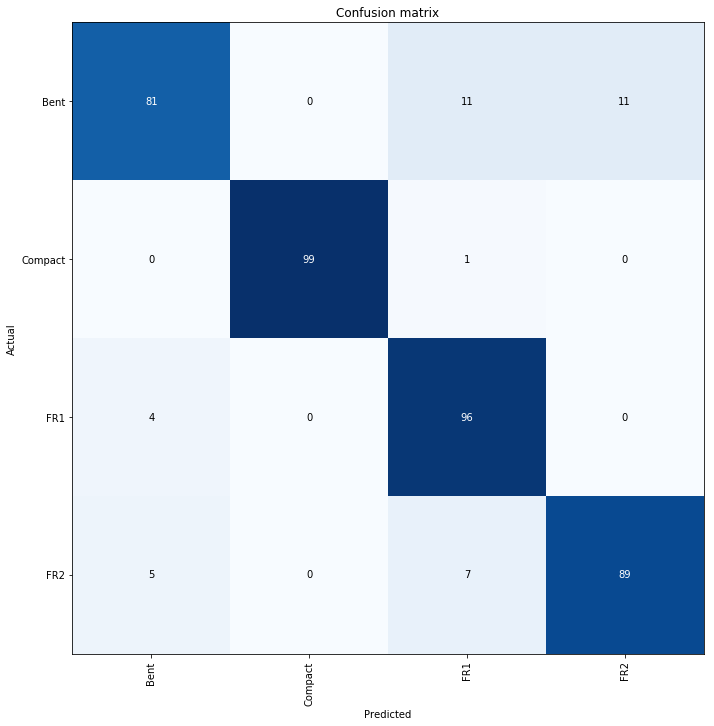

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


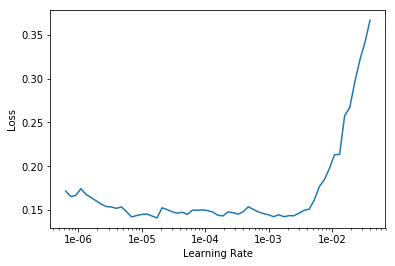

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.215633,0.377178,0.105000,00:35
1,0.260389,0.242431,0.070000,00:35
2,0.203431,0.228412,0.077500,00:36
3,0.148373,0.217596,0.065000,00:36


In [0]:
learn.save('RG_fai_dense201lt2')

In [0]:
learn.export('dense201-lt2')

In [0]:
learn = learn.load('RG_fai_dense201lt2')

In [0]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

In [0]:
learn = learn.load('RG_fai_dense201lt2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

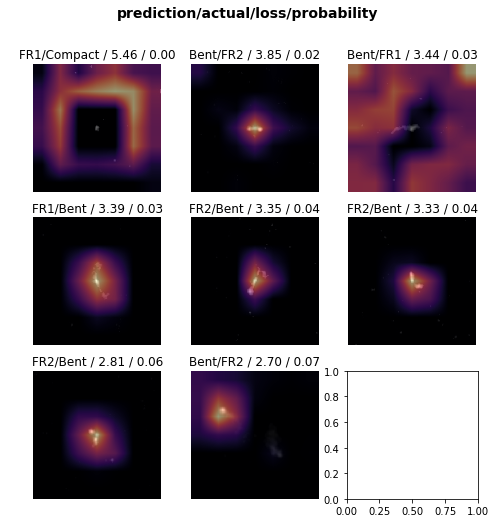

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

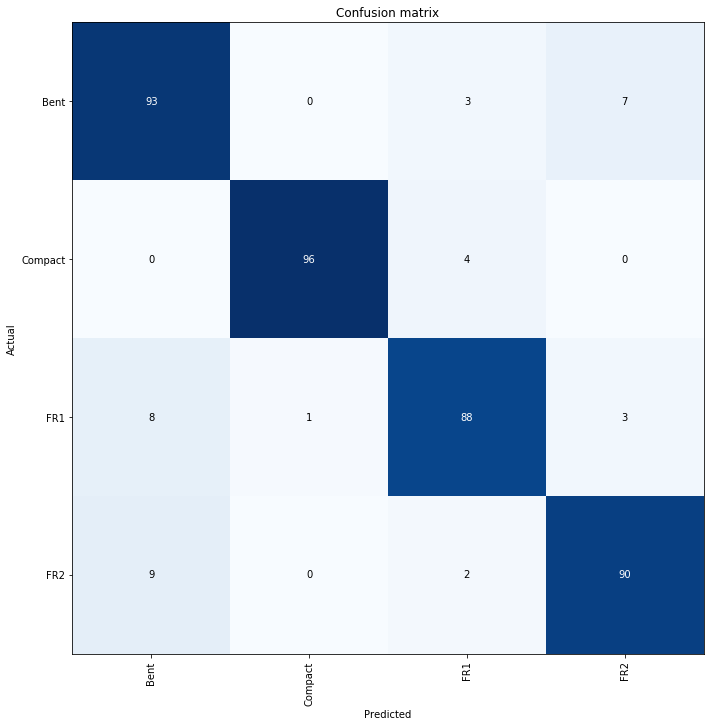

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
interp.most_confused(min_val=2)

[('Bent', 'FR1', 6),
 ('FR2', 'FR1', 6),
 ('FR1', 'FR2', 4),
 ('FR2', 'Bent', 4),
 ('Bent', 'FR2', 2),
 ('FR1', 'Bent', 2)]

In [0]:
learn.export('dense201-lt2.pkl')